In [128]:
import Pkg

In [1]:
using PolynomialRoots

In [134]:
using LaTeXStrings

┌ Info: Precompiling LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1260


In [2]:
using Plots

In [32]:
function clean_up(array)
    # Discard numerical errors (norm > 2) and spit out unique different roots
    x = vec(array)
    xclean = zeros(ComplexF64,0)
    for entry in x
        if abs(entry) < 10 #? When is it a numerical error?
            append!(xclean, entry)
        end
    end
    return unique(xclean)
end

clean_up (generic function with 1 method)

In [47]:
function sample_poly_roots(N, Iter)
    # Sample 'Iter' many roots of a polynomial of 'N'th degree
    # In an ideal world, Iter should be large compared to 3^N
    raw_roots_N = zeros(ComplexF64, N,Iter)
    for i in 1:Iter
        randomcoeff = [1;rand([-1,0,1],N)] # First coefficient is always one
        root_buffer = roots(randomcoeff)
        for j in 1:N
            raw_roots_N[j,i]=root_buffer[j]
        end
    end
    return roots_N = clean_up(raw_roots_N)
end

sample_poly_roots (generic function with 1 method)

In [119]:
function naive_scaling(n_array)
    return [n*3^n for n in n_array]
end

naive_scaling (generic function with 1 method)

In [54]:
plot(sample_poly_roots(10,100000), seriestype = [:scatter],xlims = (-2,2),ylims = (-2,2),leg=false, markercolor = :black,marker= :x)
savefig("root_n10_I100000.png")

In [117]:
N_sizes = 2:20
root_scaling_with_N_1000 = [length(sample_poly_roots(N,1000)) for N in N_sizes];
root_scaling_with_N_10000 = [length(sample_poly_roots(N,10000)) for N in N_sizes];
root_scaling_with_N_100000 = [length(sample_poly_roots(N,100000)) for N in N_sizes];

In [ ]:
root_scaling_with_N_1000000 = [length(sample_poly_roots(N,1000000)) for N in N_sizes];

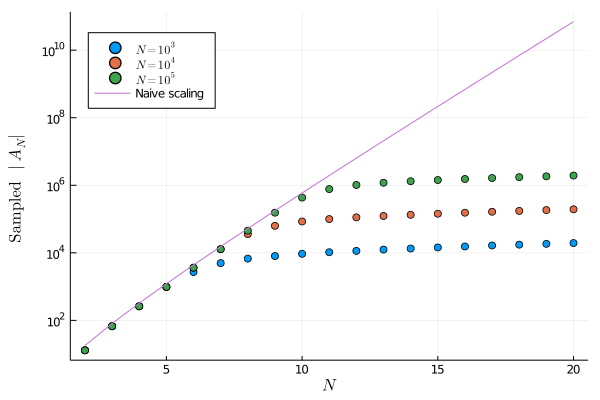

In [150]:
plot(N_sizes, root_scaling_with_N_1000, seriestype = [:scatter], label=L"N=10^3", yaxis=:log, xlabel=L"N", ylabel=L"\mathrm{Sampled }\quad|A_{N}|", legend=:topleft)
plot!(N_sizes, root_scaling_with_N_10000, seriestype = [:scatter], label=L"N=10^4")
plot!(N_sizes, root_scaling_with_N_100000, seriestype = [:scatter],label=L"N=10^5")
plot!(N_sizes, naive_scaling(N_sizes),label="Naive scaling")
savefig("sampled_A_N_vs_N.png")

In [148]:
function divide_arrays(x,y)
    return [x[i]/y[i] for i in 1:length(x)]
end

divide_arrays (generic function with 1 method)

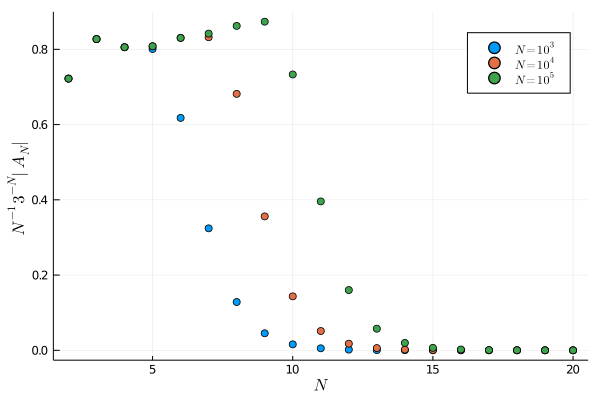

In [155]:
plot(N_sizes, divide_arrays(root_scaling_with_N_1000,naive_scaling(N_sizes)), seriestype = [:scatter], label=L"N=10^3", xlabel=L"N", ylabel=L"N^{-1}3^{-N}|A_{N}|", legend=:topright)
plot!(N_sizes, divide_arrays(root_scaling_with_N_10000,naive_scaling(N_sizes)), seriestype = [:scatter], label=L"N=10^4")
plot!(N_sizes, divide_arrays(root_scaling_with_N_100000,naive_scaling(N_sizes)), seriestype = [:scatter], label=L"N=10^5")
savefig("sampled_scaling_vs_naive.png")